In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Reading in the csv file

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.shape

(150, 5)

#### Looking at the distribution of the different species in the data

In [5]:
df.Species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: Species, dtype: int64

#### Separating into X and y

In [6]:
y = df.Species
X = df.iloc[:,0:4].copy()

#### Converting to a binary classification problem

In [7]:
y[y != "virginica"] = "Others"

You could alternatively used a map here to re-assign the 'species'

In [8]:
y.value_counts()

Others       100
virginica     50
Name: Species, dtype: int64

### Using a decision tree classifier

In [9]:
from sklearn import tree

In [10]:
# Instantiate the classifier
treemodel = tree.DecisionTreeClassifier(random_state=42)

In [11]:
treemodel.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [12]:
treemodel.feature_importances_

array([0.        , 0.02      , 0.10244241, 0.87755759])

#### Making predictions on the test set

In [13]:
y_pred = treemodel.predict(X)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y, y_pred)

array([[100,   0],
       [  0,  50]], dtype=int64)

### Visualizing the decision tree

In [16]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image

C:\Users\rahim.baig\AppData\Roaming\Python\Python36\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


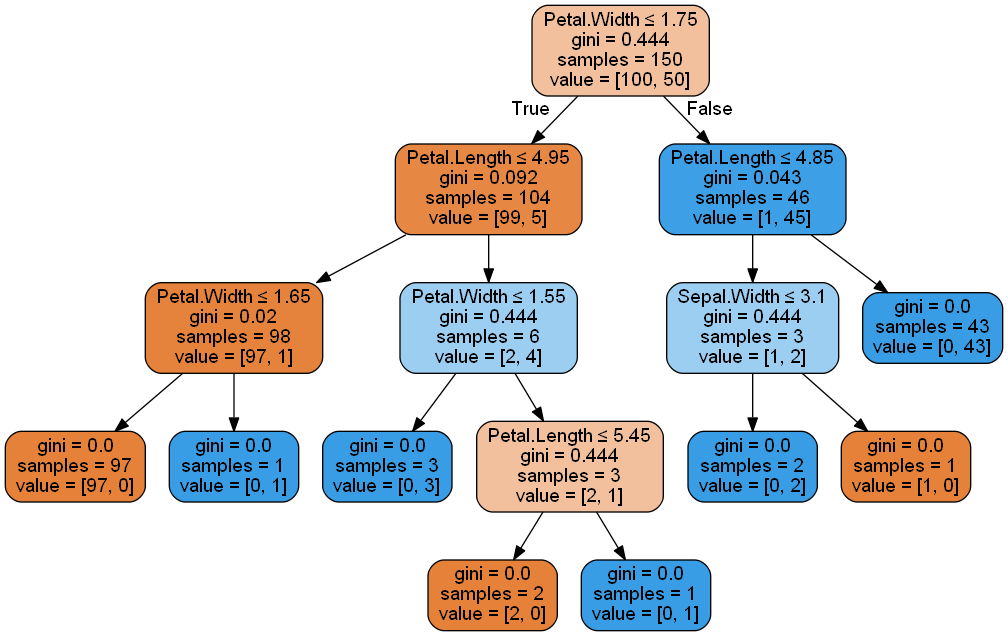

In [17]:
dot_data = StringIO()
export_graphviz(treemodel, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns[:4])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=500,height=500)

## Using RandomForest classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier(oob_score=True, n_estimators=100, random_state=42, n_jobs=-1, max_depth=2)

In [20]:
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

#### Feature importances

In [21]:
rf.feature_importances_

array([0.12604155, 0.00344935, 0.45813043, 0.41237867])

#### Extracting an estimate - an individual tree from the forest

In [22]:
rf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                        max_features='auto', max_leaf_nodes=None,
                        mi

In [23]:
rf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1608637542, splitter='best')

In [24]:
type(rf.estimators_[0])

sklearn.tree.tree.DecisionTreeClassifier

In [25]:
rf_tree = rf.estimators_[2]

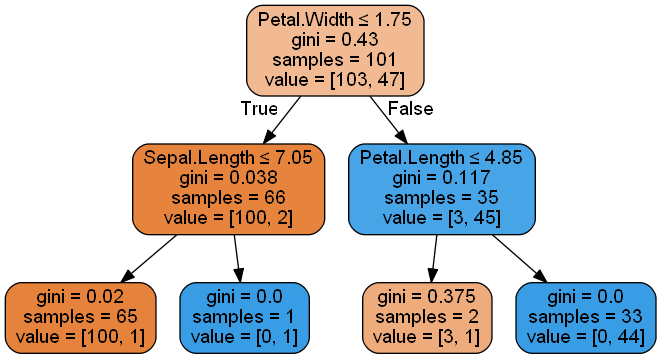

In [26]:
dot_data = StringIO()
export_graphviz(rf.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns[:4])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=500,height=500)

In [36]:
y_pred = rf_tree.predict(X)
confusion_matrix(y, y_pred)

TypeError: '<' not supported between instances of 'float' and 'str'

### Trying Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [41]:
gb = GradientBoostingClassifier(max_depth=1, n_estimators=100)

In [42]:
gb.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [43]:
gb.estimators_[0][0]

DecisionTreeRegressor(criterion='friedman_mse', max_depth=1, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort='auto',
                      random_state=<mtrand.RandomState object at 0x000001E0970C2798>,
                      splitter='best')

### Visualizing the tree from boosting

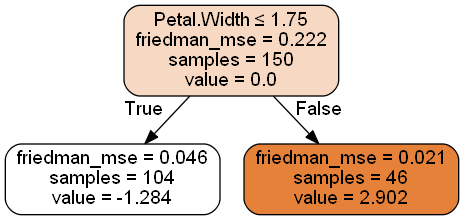

In [44]:
dot_data = StringIO()
export_graphviz(gb.estimators_[0][0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns[:4])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(),width=500,height=500)

In [34]:
gb.feature_importances_

array([0.00958041, 0.00754913, 0.18388684, 0.79898361])

In [35]:
y_pred = gb.predict(X)
confusion_matrix(y, y_pred)

array([[100,   0],
       [  0,  50]], dtype=int64)